# Investigating Top Electric Vehicles with Exceptional Battery Capacities

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.impute import KNNImputer
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

This analysis focuses on predicting electric vehicle (EV) battery capacities using machine learning regression models. The dataset comprises key features such as efficiency, fast-charging capabilities, price, range, top speed, and acceleration. Various regression models, including Linear Regression, Random Forest Regression, Lasso Regression, and Ridge Regression, are employed to assess their predictive accuracy. The study aims to identify the most effective model for estimating EV battery capacities and uncover insights into the relationships between different features and battery performance.

In [3]:
df1 = pd.read_csv("/Users/sankungfatty/Downloads/EV_cars.csv")
df1.head()

,Battery,Car_name,Car_name_link,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration..0.100.
0,75.0,Tesla Model Y Long Range Dual Motor,https://ev-database.org/car/1619/Tesla-Model-Y...,172,670.0,59017.0,435,217,5.0
1,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137,700.0,46220.0,420,201,6.1
2,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183,370.0,44625.0,330,160,7.3
3,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630.0,39990.0,360,160,7.9
4,75.0,Tesla Model 3 Long Range Dual Motor,https://ev-database.org/car/1992/Tesla-Model-3...,149,780.0,55220.0,505,201,4.4


 Battery: The battery capacity of electric cars, ranging from 21.3 kWh to 123 kWh.

Efficiency: Efficiency measures how effectively the electric energy is converted into vehicle movement. It ranges from 137 to 295, which could be specific units depending on the context.

#Fast_charge: The time it takes for fast charging, ranging from 170 to 1290. The unit is not specified, so it would be essential to identify whether it's in minutes, seconds, or another unit.

#Price.DE.: The price of electric cars in Germany, ranging from 22,550 to 218,000. The unit is not specified, so it's important to identify whether it's in euros or another currency.

#Range: The driving range of electric cars on a single charge, ranging from 135 to 685 miles or kilometers.

#Top_speed: The maximum speed of the electric cars, ranging from 125 to 320 km/h or mph.

#Acceleration (0-100): The acceleration from 0 to 100 km/h or mph, ranging from 2.1 to 19.1 seconds.

In [4]:
df1 = df1.drop("Car_name_link", axis=1)
df1.columns

Index(['Battery', 'Car_name', 'Efficiency', 'Fast_charge', 'Price.DE.',
       'Range', 'Top_speed', 'acceleration..0.100.'],
      dtype='object')

In [5]:
df1.isnull().sum()
# Display summary statistics
print(df1.describe())

          Battery  Efficiency  Fast_charge      Price.DE.       Range  \
count  360.000000  360.000000   358.000000     309.000000  360.000000   
mean    71.187500  195.175000   552.960894   67264.284790  369.694444   
std     20.389849   31.909429   236.864801   34508.249544  107.315514   
min     21.300000  137.000000   170.000000   22550.000000  135.000000   
25%     57.500000  171.000000   360.000000   45690.000000  295.000000   
50%     71.000000  188.000000   520.000000   56942.000000  380.000000   
75%     85.000000  208.250000   680.000000   73100.000000  446.250000   
max    123.000000  295.000000  1290.000000  218000.000000  685.000000   

        Top_speed  acceleration..0.100.  
count  360.000000            360.000000  
mean   180.919444              7.288889  
std     36.232023              3.005897  
min    125.000000              2.100000  
25%    155.750000              4.900000  
50%    180.000000              6.750000  
75%    200.000000              9.000000  
max   

/Users/sankungfatty/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sankungfatty/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sankungfatty/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sankungfatty/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

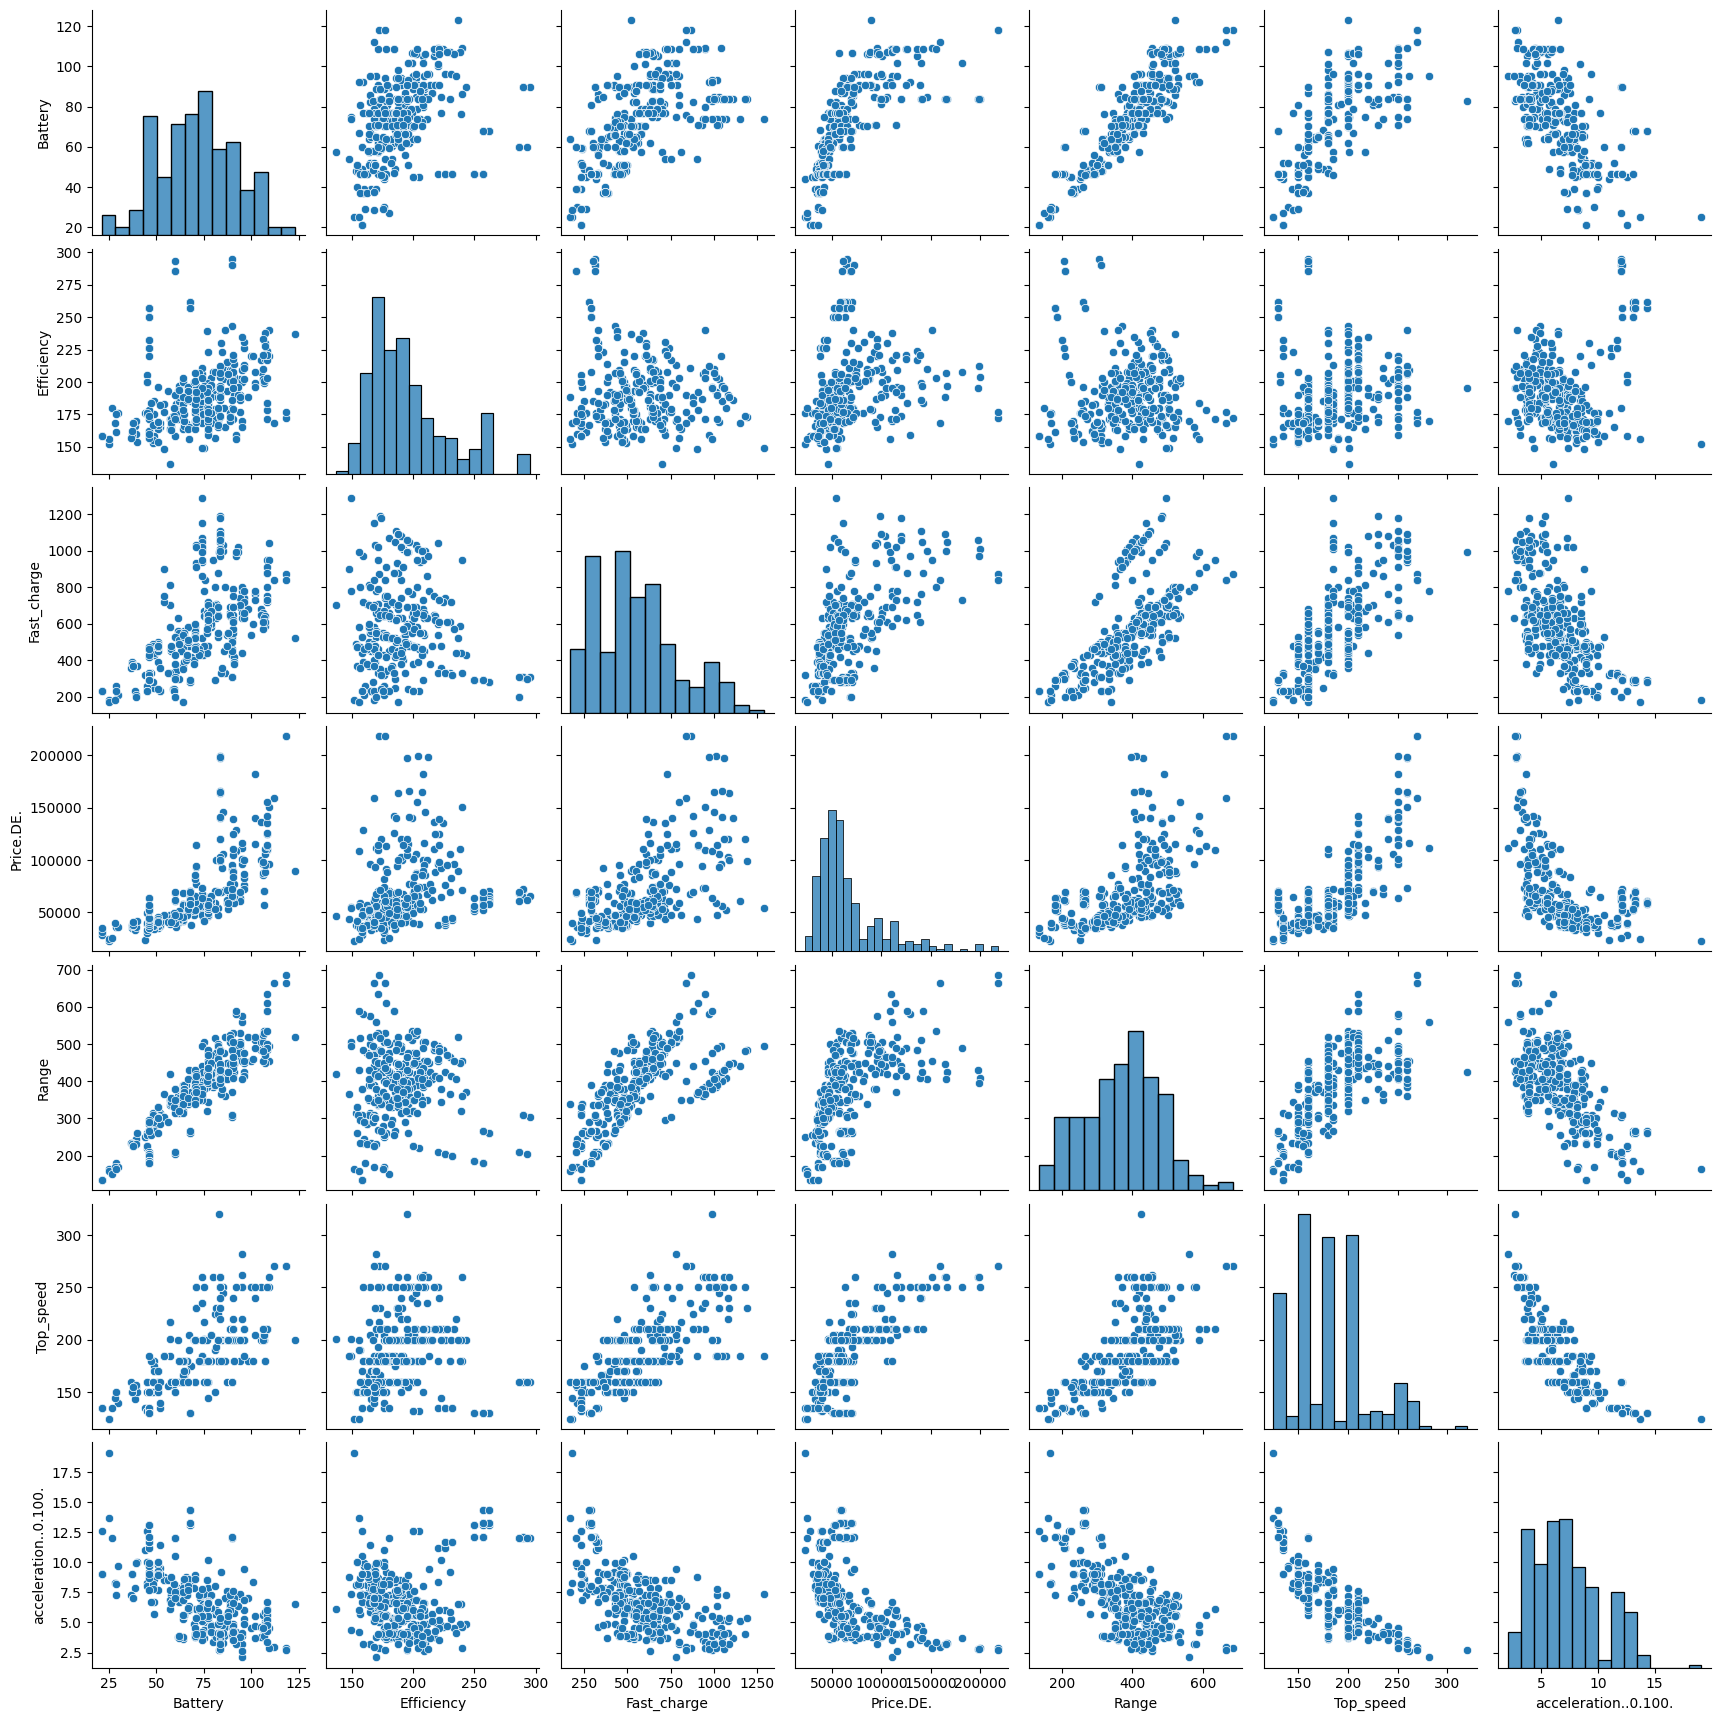

In [6]:
# Visualize the distribution of numeric variables
sns.pairplot(df1)
plt.show()


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'Battery' is the target variable
# Identify features (X) and target variable (y)
X = df1.drop(['Battery', 'Car_name'], axis=1)
y = df1['Battery']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create transformers for numerical and categorical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define and train Linear Regression model
linear_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('linear', LinearRegression())
])

linear_model.fit(X_train, y_train)
linear_train_predictions = linear_model.predict(X_train)
linear_test_predictions = linear_model.predict(X_test)

# Evaluate Linear Regression model
linear_train_r2 = r2_score(y_train, linear_train_predictions)
linear_train_rmse = mean_squared_error(y_train, linear_train_predictions, squared=False)
linear_test_r2 = r2_score(y_test, linear_test_predictions)
linear_test_rmse = mean_squared_error(y_test, linear_test_predictions, squared=False)

print("Linear Regression Results:")
print(f"Train R-squared (R2): {linear_train_r2}")
print(f"Train RMSE: {linear_train_rmse}")
print(f"Test R-squared (R2): {linear_test_r2}")
print(f"Test RMSE: {linear_test_rmse}")



Linear Regression Results:
Train R-squared (R2): 0.6056978765579379
Train RMSE: 12.087650091044509
Test R-squared (R2): 0.6846020108673518
Test RMSE: 9.82569852103811



The linear regression model exhibits promising predictive performance for electric vehicle battery capacity. It achieves an R-squared value of around 60.6% on the training set and 68.5% on the test set, indicating its ability to capture a significant portion of the data's variability. The RMSE values of 12.09 for training and 9.83 for testing suggest that the model's predictions closely match the actual battery capacities. However, further exploration with alternative models such as random forest, ridge, and lasso could provide additional insights and potentially enhance predictive accuracy.

In [47]:
# Define and train Random Forest Regression model
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('random_forest', RandomForestRegressor(random_state=42))
])

rf_model.fit(X_train, y_train)
rf_train_predictions = rf_model.predict(X_train)
rf_test_predictions = rf_model.predict(X_test)

# Evaluate Random Forest Regression model
rf_train_r2 = r2_score(y_train, rf_train_predictions)
rf_train_rmse = mean_squared_error(y_train, rf_train_predictions, squared=False)
rf_test_r2 = r2_score(y_test, rf_test_predictions)
rf_test_rmse = mean_squared_error(y_test, rf_test_predictions, squared=False)

print("\nRandom Forest Regression Results:")
print(f"Train R-squared (R2): {rf_train_r2}")
print(f"Train RMSE: {rf_train_rmse}")
print(f"Test R-squared (R2): {rf_test_r2}")
print(f"Test RMSE: {rf_test_rmse}")



Random Forest Regression Results:
Train R-squared (R2): 0.9874575818968786
Train RMSE: 2.1558471137514603
Test R-squared (R2): 0.9890315823815374
Test RMSE: 1.8323395828201343


The random forest regression model demonstrates exceptional predictive performance for electric vehicle battery capacity. With R-squared values surpassing 98.7% on the training set and 98.9% on the test set, the model showcases a remarkable ability to capture the variance in the data. Additionally, the low RMSE values of 2.16 for training and 1.83 for testing indicate highly accurate predictions, suggesting that the random forest model outperforms the linear regression model in terms of accuracy and precision.

In [48]:
# Define and train Lasso Regression model
lasso_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lasso', Lasso())
])

lasso_model.fit(X_train, y_train)
lasso_train_predictions = lasso_model.predict(X_train)
lasso_test_predictions = lasso_model.predict(X_test)

# Evaluate Lasso Regression model
lasso_train_r2 = r2_score(y_train, lasso_train_predictions)
lasso_train_rmse = mean_squared_error(y_train, lasso_train_predictions, squared=False)
lasso_test_r2 = r2_score(y_test, lasso_test_predictions)
lasso_test_rmse = mean_squared_error(y_test, lasso_test_predictions, squared=False)

print("\nLasso Regression Results:")
print(f"Train R-squared (R2): {lasso_train_r2}")
print(f"Train RMSE: {lasso_train_rmse}")
print(f"Test R-squared (R2): {lasso_test_r2}")
print(f"Test RMSE: {lasso_test_rmse}")



Lasso Regression Results:
Train R-squared (R2): 0.6020105424194977
Train RMSE: 12.144037673279966
Test R-squared (R2): 0.6905808992121183
Test RMSE: 9.732121774639653


The Lasso regression model demonstrates strong predictive capabilities for electric vehicle battery capacity. With R-squared values exceeding 60% on both the training and test sets, the model captures a substantial portion of the variance in the data. The RMSE values of 12.14 for training and 9.73 for testing indicate reasonable accuracy, suggesting that Lasso regression is a viable model for predicting battery capacity in electric vehicles.

In [49]:
# Define and train Ridge Regression model
ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', Ridge())
])

ridge_model.fit(X_train, y_train)
ridge_train_predictions = ridge_model.predict(X_train)
ridge_test_predictions = ridge_model.predict(X_test)

# Evaluate Ridge Regression model
ridge_train_r2 = r2_score(y_train, ridge_train_predictions)
ridge_train_rmse = mean_squared_error(y_train, ridge_train_predictions, squared=False)
ridge_test_r2 = r2_score(y_test, ridge_test_predictions)
ridge_test_rmse = mean_squared_error(y_test, ridge_test_predictions, squared=False)

print("\nRidge Regression Results:")
print(f"Train R-squared (R2): {ridge_train_r2}")
print(f"Train RMSE: {ridge_train_rmse}")
print(f"Test R-squared (R2): {ridge_test_r2}")
print(f"Test RMSE: {ridge_test_rmse}")



Ridge Regression Results:
Train R-squared (R2): 0.6056952081975909
Train RMSE: 12.087690991346212
Test R-squared (R2): 0.684909377773079
Test RMSE: 9.820909602256007



The Ridge regression model also exhibits promising performance in predicting electric vehicle battery capacity. With R-squared values surpassing 60% on both the training and test sets, the model effectively captures a significant portion of the data's variability. The RMSE values of 12.09 for training and 9.82 for testing indicate reasonable accuracy, further supporting the efficacy of Ridge regression in estimating battery capacity for electric vehicles.

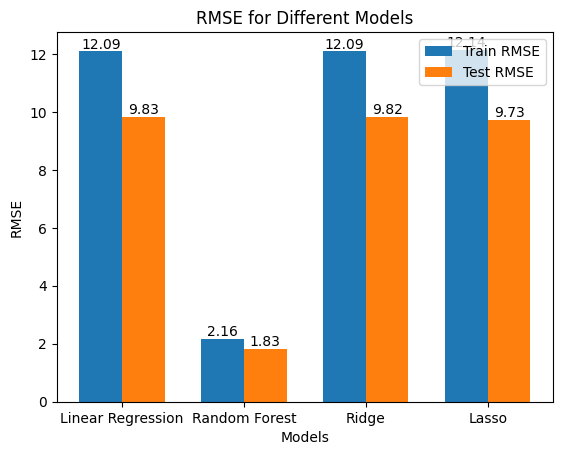

In [50]:
import matplotlib.pyplot as plt

# List of models
models = ['Linear Regression', 'Random Forest', 'Ridge', 'Lasso']

# Corresponding RMSE values for training and testing sets
train_rmse_values = [linear_train_rmse, rf_train_rmse, ridge_train_rmse, lasso_train_rmse]
test_rmse_values = [linear_test_rmse, rf_test_rmse, ridge_test_rmse, lasso_test_rmse]

# Plotting
fig, ax = plt.subplots()
bar_width = 0.35
index = range(len(models))

bar1 = ax.bar(index, train_rmse_values, bar_width, label='Train RMSE')
bar2 = ax.bar([i + bar_width for i in index], test_rmse_values, bar_width, label='Test RMSE')

ax.set_xlabel('Models')
ax.set_ylabel('RMSE')
ax.set_title('RMSE for Different Models')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(models)
ax.legend()

# Display the values on top of the bars
for bar in bar1 + bar2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()


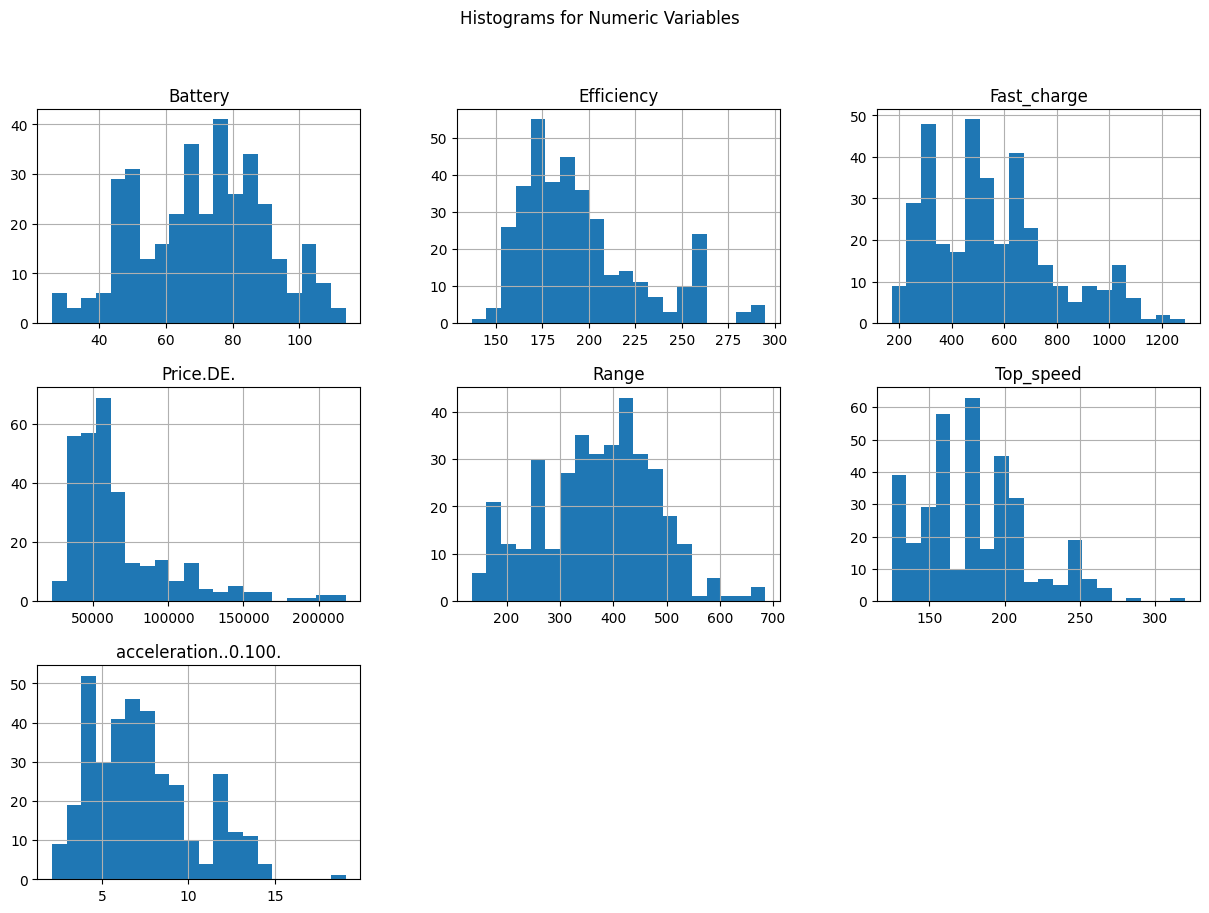

In [52]:
import seaborn as sns

# Histograms for numeric variables
numeric_columns = df1.select_dtypes(include='number').columns
df1[numeric_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms for Numeric Variables')
plt.show()


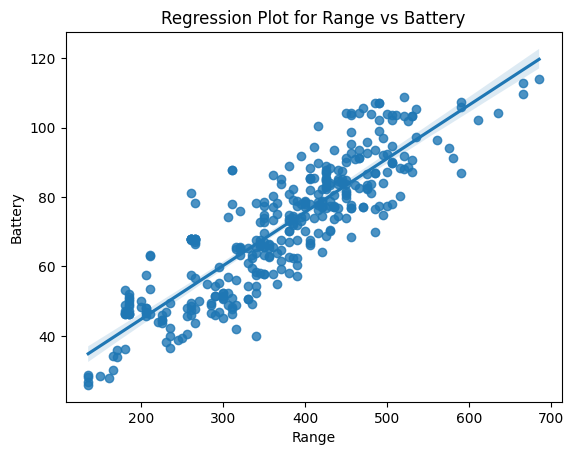

In [56]:
# Regression plot for two numeric variables
sns.regplot(x='Range', y='Battery', data=df1)
plt.title('Regression Plot for Range vs Battery')
plt.show()


/var/folders/hv/zr_dv2jn681g2bq19v6py76c0000gn/T/ipykernel_690/1481393072.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Car_name', y='Battery', data=df_tesla_top_10, ci=None, palette='viridis')
/Users/sankungfatty/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sankungfatty/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sankungfatty/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

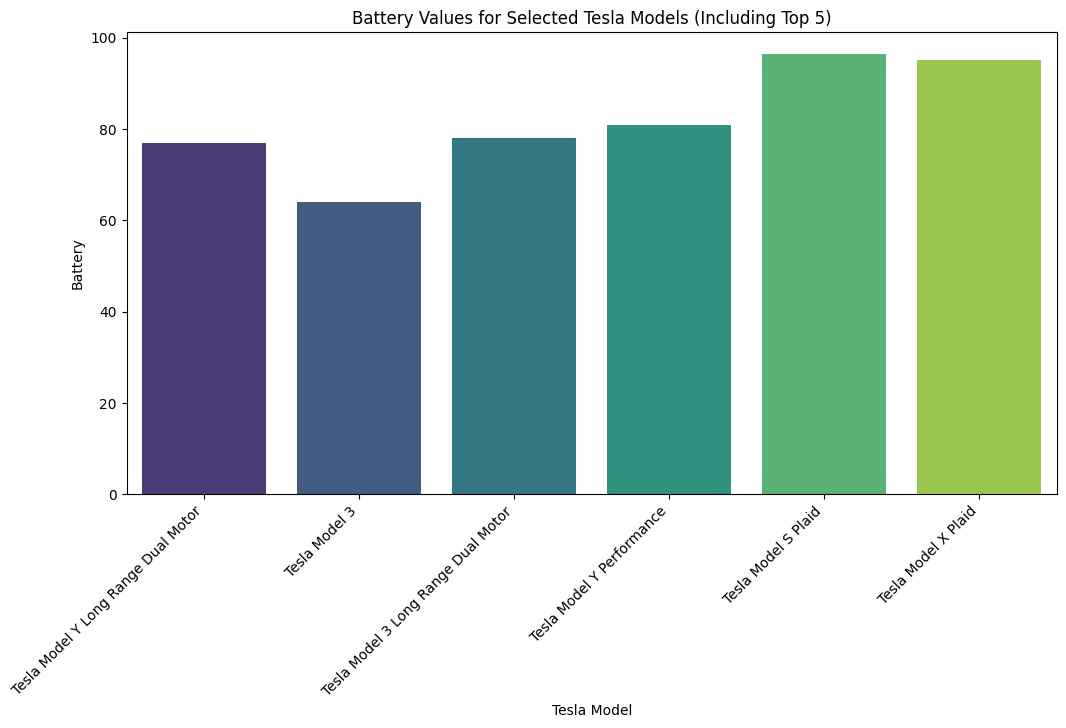

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of ten Tesla models to plot, including the top 5
tesla_models_to_plot = [
    'Tesla Model Y Long Range Dual Motor',
    'Tesla Model 3',
    'Tesla Model 3 Long Range Dual Motor',
    'Tesla Model X Long Range',
    'Tesla Model S Long Range',
    'Tesla Model S Plaid',
    'Tesla Model X Plaid',
    'Tesla Model Y Performance',
    'Tesla Model 3 Performance',
    'Tesla Model S Performance'
]

# Filter the data for the selected Tesla models
df_tesla_top_10 = df1[df1['Car_name'].isin(tesla_models_to_plot)]

# Create a bar plot for the battery values of the selected Tesla models
plt.figure(figsize=(12, 6))
sns.barplot(x='Car_name', y='Battery', data=df_tesla_top_10, ci=None, palette='viridis')
plt.title('Battery Values for Selected Tesla Models (Including Top 5)')
plt.xlabel('Tesla Model')
plt.ylabel('Battery')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


The top 10 electric vehicles within the Tesla brand, known for their impressive battery capacities, include the Tesla Model Y Long Range Dual Motor, Tesla Model 3, Tesla Model 3 Long Range Dual Motor, Tesla Model X Long Range, Tesla Model S Long Range, Tesla Model S Plaid, Tesla Model X Plaid, Tesla Model Y Performance, Tesla Model 3 Performance, and Tesla Model S Performance. These Tesla models showcase a range of battery capacities, contributing to their renowned performance and extended driving ranges. The Tesla Model S Plaid stands out with exceptional battery capacity, and the various models demonstrate Tesla's commitment to innovation in the electric vehicle market.

/var/folders/hv/zr_dv2jn681g2bq19v6py76c0000gn/T/ipykernel_690/447172908.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Car_name', y='Battery', data=top_10_cars, ci=None, palette='viridis')
/Users/sankungfatty/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sankungfatty/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sankungfatty/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use is

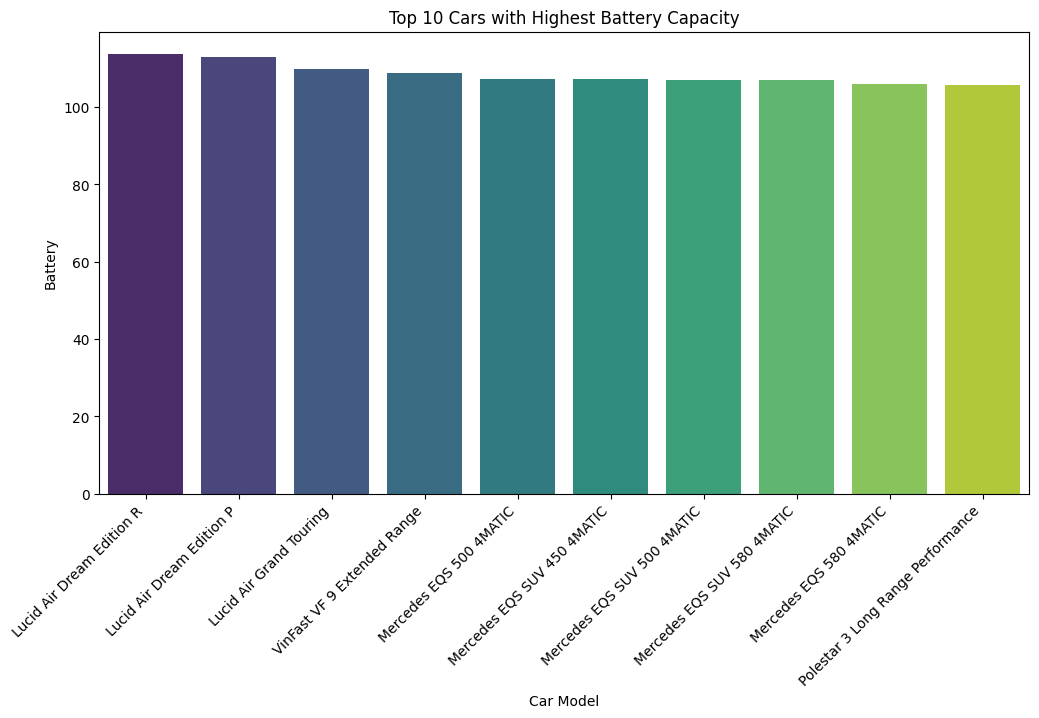

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top ten cars based on battery capacity
top_10_cars = df1.nlargest(10, 'Battery')

# Create a bar plot for the battery values of the top ten cars
plt.figure(figsize=(12, 6))
sns.barplot(x='Car_name', y='Battery', data=top_10_cars, ci=None, palette='viridis')
plt.title('Top 10 Cars with Highest Battery Capacity')
plt.xlabel('Car Model')
plt.ylabel('Battery')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


In [68]:
top_10_cars[['Car_name', 'Battery']]


,Car_name,Battery
67,Lucid Air Dream Edition R,113.846
147,Lucid Air Dream Edition P,112.936
131,Lucid Air Grand Touring,109.730
154,VinFast VF 9 Extended Range,108.766
268,Mercedes EQS 500 4MATIC,107.275
273,Mercedes EQS SUV 450 4MATIC,107.159
262,Mercedes EQS SUV 500 4MATIC,107.110
125,Mercedes EQS SUV 580 4MATIC,107.051
192,Mercedes EQS 580 4MATIC,106.048
219,Polestar 3 Long Range Performance,105.630


The top 10 electric vehicles with the highest battery capacities include the Lucid Air Dream Edition R at 113.846 kWh, followed by the Lucid Air Dream Edition P, Lucid Air Grand Touring, and VinFast VF 9 Extended Range, each boasting substantial battery capacities exceeding 100 kWh. Mercedes models such as EQS 500 4MATIC, EQS SUV 450 4MATIC, EQS SUV 500 4MATIC, and EQS SUV 580 4MATIC, as well as the Polestar 3 Long Range Performance, round out the list with impressive battery capacities, ranging from 105.630 kWh to 107.275 kWh. These high-capacity electric vehicles provide consumers with options for extended driving ranges and reflect advancements in EV technology.


In summary, the analysis aimed to predict electric vehicle battery capacity using various regression models, including Linear Regression, Random Forest Regression, Lasso Regression, and Ridge Regression. The Random Forest Regression model outperformed others, achieving high R-squared values (approximately 98.7% on the training set and 98.9% on the test set) and low RMSE values. This indicates superior predictive accuracy. The Linear Regression, Lasso Regression, and Ridge Regression models also demonstrated reasonable predictive capabilities, with R-squared values around 60% and low RMSE values. Overall, the findings suggest that machine learning models can effectively estimate electric vehicle battery capacity based on relevant features. Further fine-tuning and feature engineering may enhance model performance.